In [2]:
import sympy as sp 
from sympy import Matrix
def unitaryCheck(M):
    return M*M.H == sp.eye(M.shape[0])
unitaryCheck(Matrix([[1,0],[0,sp.I]]))

True

In [3]:
a = sp.Symbol('a')
b = sp.Symbol('b')
sp.expand((a-b)**2+(a+b)**2)

2*a**2 + 2*b**2

In [4]:
theta = sp.Symbol('theta',real=True)
norm = sp.Rational(4)

rotationMatrix = Matrix([
    [sp.cos(theta)**sp.sqrt(norm), -sp.sin(theta)**sp.sqrt(norm)],
    [sp.sin(theta)**sp.sqrt(norm), sp.cos(theta)**sp.sqrt(norm)]
])
vector = Matrix([a,b])


In [5]:
x = sp.Symbol('x')
y = sp.Symbol('y')
r = sp.Symbol('r',real=True,positive=True)
equation = sp.Eq(((x**4+y**4-x**2-y**2).subs(x,r*sp.cos(theta)).subs(y,r*sp.sin(theta))).simplify(),0)
solution = sp.solve(equation,r)[1]
rotationMatrix   = rotationMatrix+sp.eye(2)*solution
transformation = rotationMatrix*vector


In [6]:
rotationMatrix.expand().det()

(4*sqrt(1/(2*sin(theta)**4 - 2*sin(theta)**2 + 1))*sin(theta)**4*cos(theta)**2 - 4*sqrt(1/(2*sin(theta)**4 - 2*sin(theta)**2 + 1))*sin(theta)**2*cos(theta)**2 + 2*sqrt(1/(2*sin(theta)**4 - 2*sin(theta)**2 + 1))*cos(theta)**2 + 2*sin(theta)**8 - 2*sin(theta)**6 + 2*sin(theta)**4*cos(theta)**4 + sin(theta)**4 - 2*sin(theta)**2*cos(theta)**4 + cos(theta)**4 + 1)/(2*sin(theta)**4 - 2*sin(theta)**2 + 1)

In [7]:
expression = (transformation[0]**norm + transformation[1]**norm ).expand()



In [8]:
angle = sp.pi/2
expression.simplify().subs(theta,angle)

2*a**4 + 12*a**2*b**2 + 2*b**4

In [9]:
rotationMatrix.subs(theta, angle)

Matrix([
[1, -1],
[1,  1]])

In [10]:
(expression+solution).subs(theta,angle).simplify()

2*a**4 + 12*a**2*b**2 + 2*b**4 + 1

In [22]:
theta = sp.symbols('theta',real=True)
phi =sp.symbols('phi',real=True)
X = sp.Matrix([
    [0,1],
    [1,0]
])
Y = sp.Matrix([
    [0,-sp.I],
    [sp.I,0]
])
Z = sp.Matrix([
    [1,0],
    [0,-1]
])
r = sp.Matrix([sp.sin(theta)*sp.cos(phi),sp.sin(theta)*sp.sin(phi),sp.cos(theta)])
newbie = r[0]*X+r[1]*Y+r[2]*Z
# latex mode
sp.init_printing()
# get latex of newbie
print(sp.latex(newbie))

\left[\begin{matrix}\cos{\left(\theta \right)} & - i \sin{\left(\phi \right)} \sin{\left(\theta \right)} + \sin{\left(\theta \right)} \cos{\left(\phi \right)}\\i \sin{\left(\phi \right)} \sin{\left(\theta \right)} + \sin{\left(\theta \right)} \cos{\left(\phi \right)} & - \cos{\left(\theta \right)}\end{matrix}\right]


In [12]:
r.T*r

In [13]:
newbie.det()

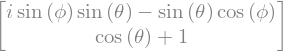

In [14]:
newbie.eigenvects()
niceVec = newbie.eigenvects()[0][2][0]
niceVec = niceVec*(sp.cos(theta)+1)
niceVec

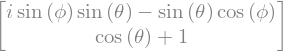

In [23]:
niceVec

In [15]:
answer =niceVec.subs({theta:sp.pi/2,phi:sp.pi/2})

In [16]:
answer

In [17]:
M=sp.Matrix([sp.exp(-sp.I*phi),sp.cos(theta)-1])

In [27]:
scalingDude = sp.Rational(1)/sp.sqrt(((M.H*M)[0]))
print(sp.latex(scalingDude.expand()))

\frac{1}{\sqrt{\cos^{2}{\left(\theta \right)} - 2 \cos{\left(\theta \right)} + 2}}


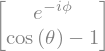

In [19]:
M

In [20]:
Matrix = sp.Matrix([
    [1,(1-sp.cos(theta))/(sp.sin(theta)*sp.exp(-sp.I*phi))]
])
(Matrix*Matrix.H).subs({theta:sp.pi/2})

In [21]:
sp.Matrix([sp.I]).H